**Use an image of an extended source generated externally. Import it, and 
scale it to a given integrated K-band magnitude. Observe it with a SCAO 
PSF for a 16mag on-axis guide star.**

Using Halpha image of HCG04 from Eigenthaler et al. 2015 http://adsabs.harvard.edu/abs/2015MNRAS.451.2793E, because it has fewer contaminating nearby objects. 

Main parameters Distance = 106.36 Mpc Scale ~ 515 pc/arcsec pixel_scale=0.145" -> 74.6 pc/pixel. 

MICADO will provide ~33 pc/pixel at z=2. Image will be undersampled, but for a factor ~2.

Data for this example can be found here 
https://github.com/astronomyk/SimCADO/tree/master/docs/source/_static/images/HCG04_Halpha_fluxcalibrated.fits

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import simcado
print(simcado.__data_dir__)

/home/mverdugo/simcado_work/simcado/data


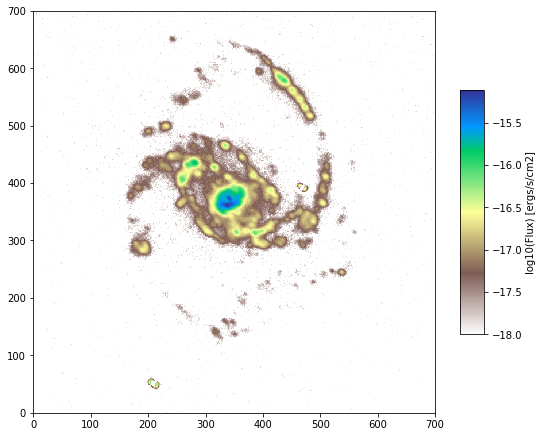

In [4]:
original = fits.getdata("HCG04_Halpha_fluxcalibrated.fits")
galaxy_data=original[1100:1800,1100:1800] # cutting the edges

fig=plt.figure(figsize=(9,9))
galaxy_data = galaxy_data 
plt.imshow(np.log10(galaxy_data)-16,origin="lower",cmap="terrain_r",vmin=-18)#,vmin=0,vmax=0.5)
colorbar=plt.colorbar(shrink=0.5,aspect=10)
colorbar.set_label("log10(Flux) [ergs/s/cm2]")

In [5]:
z = 2
magnitude = 20 # Vega system, probably the magnitude of a L* galaxy at z~2
               # Pozzetti, 2003, Cirasuolo 2007, Gobat 2011

ec = simcado.source.redshift_SED(z, "spiral", mag=20, filter_name='TC_filter_Ks.dat')

lam, spec = ec.lam, ec.val

galaxy_src = simcado.source.source_from_image(galaxy_data, lam, spec,
                                              plate_scale=0.004,
                                              flux_threshold=0.01)

# plate scale change the apparent size of the galaxy

In [7]:
dit = 60
ndit = 120

sim_galaxy = simcado.run(galaxy_src, OBS_DIT=dit, OBS_NDIT=ndit,
                         INST_FILTER_TC="TC_filter_Ks.dat", SCOPE_PSF_FILE="PSF_SCAO.fits",
                         FPA_LINEARITY_CURVE=None)
print("Total exptime is", dit*ndit/3600, "h"  )

Detector layout
 id x_cen y_cen xhw  yhw  x_len y_len pixsize angle gain
--- ----- ----- ---- ---- ----- ----- ------- ----- ----
  1   0.0   0.0 7.68 7.68  1024  1024   0.015   0.0  1.0
Creating 3 layer(s) per chip
1 chip(s) will be simulated
Generating image for chip 1
Reading out chip 1 using superfast
DIT = 60    NDIT = 120
Total exptime is 2.0 h


Text(180, 70, '1 arcsec')

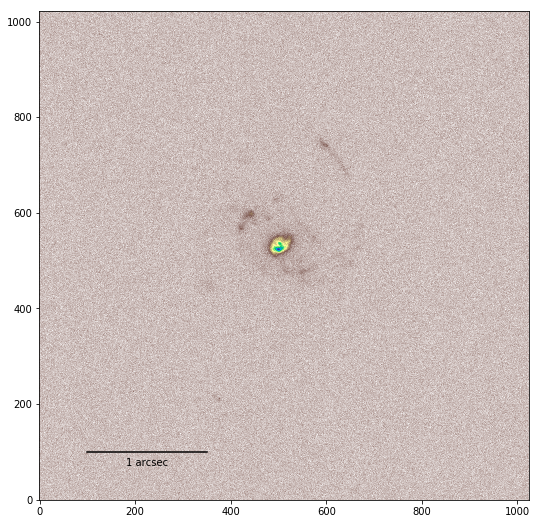

In [8]:
fig=plt.figure(figsize=(9,9))
plt.imshow(sim_galaxy[0].data, origin="lower", cmap="terrain_r")
plt.plot((100,350),(100,100), 'k')
plt.text(180,70, "1 arcsec")

In [ ]:
# Writing to disk
sim_galaxy.writeto("sim_distant_galaxy.fits", overwrite=True)